In [1]:
import numpy as np
import matplotlib.pyplot as plt

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

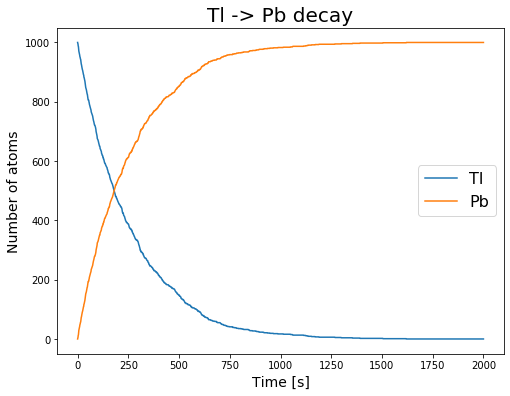

In [2]:
tau = 3.052*60
Tl = 1000
Pb = 0

sample = 2000
line_space = np.linspace(0, sample, sample+1)

Tl_sample = []
Tl_sample.append(Tl)
Pb_sample = []
Pb_sample.append(Pb)

for t in range(sample):
    for at in range(Tl):
        prob = np.random.random(1)
        prob_t = 1 - np.power(2,-1/tau)
        if prob < prob_t:
            Tl = Tl-1
            Pb = Pb+1
    Tl_sample.append(Tl)
    Pb_sample.append(Pb)

fig, ax = plt.subplots(1,1, figsize = (8,6))
plt.plot(Tl_sample, label = 'Tl')
plt.plot(Pb_sample, label = 'Pb')
ax.set_xlabel('Time [s]', fontsize = 14)
ax.set_ylabel('Number of atoms', fontsize = 14)
ax.set_title('Tl -> Pb decay', fontsize = 20)
plt.legend(fontsize = 16)

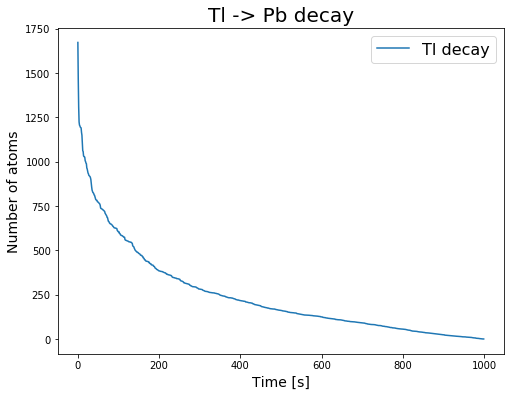

In [3]:
def expon_icdf(p):   
    return -tau*(np.log(1-p)/np.log(2))

n = 1000
samples = np.random.random(n)
decay = expon_icdf(samples)
decay = np.sort(decay)[::-1]

fig, ax = plt.subplots(1,1, figsize = (8,6))
plt.plot(decay, label = 'Tl decay')
ax.set_xlabel('Time [s]', fontsize = 14)
ax.set_ylabel('Number of atoms', fontsize = 14)
ax.set_title('Tl -> Pb decay', fontsize = 20)
plt.legend(fontsize = 16)

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

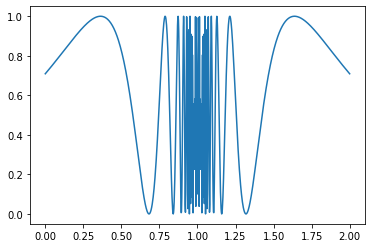

In [4]:
def f(x):
    val = (np.sin(1 / (1-x)))**2
    return val

x = np.linspace(0.001, 1.999, 1000)
plt.plot(x, f(x))

N = 100000

def integral(N):
    count = 0
    for i in range(N):
        x = 2 * np.random.random() 
        y = np.random.random()     
        if y < f(x): 
            count = count + 1
    I = 2 * count / N
    return I

In [5]:
n_iter = 100
integral_val = []

for i in range(n_iter):
    I = integral(N)
    integral_val.append(I)

mean = np.mean(integral_val)
std = np.std(integral_val)/np.sqrt(n_iter)

print(f'The integral value with hit/miss method is {round(mean,5)} ± {round(std,5)} ')

The integral value with hit/miss method is 1.34725 ± 0.0003 


In [6]:
def integral_1(N):
    x = 2 * np.random.random(N) 
    I = (2/N)*np.sum(f(x))     
    return I

integral_val = []
for i in range(n_iter):
    I = integral_1(N)
    integral_val.append(I)

mean = np.mean(integral_val)
std = np.std(integral_val)/np.sqrt(n_iter)

print(f'The integral value with mean value method is {round(mean,5)} ± {round(std,5)} ')

The integral value with mean value method is 1.3468 ± 0.0002 


In [7]:
print('The correct value of the integral is 1.34691')
print('The mean value method return a value which is more close to ther eal one with a bit smaller standard deviation')

The correct value of the integral is 1.34691
The mean value method return a value which is more close to ther eal one with a bit smaller standard deviation


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [8]:
def integral_circle(N):
    count = 0
    for i in range(N):
        x = np.random.random()* 2 - 1
        y = np.random.random()* 2 - 1
        if x*x + y*y  <= 1:
            count = count + 1
    I = 4 * count/N
    return I

N = 100000
integral_val = []
n_iter = 100

for i in range(n_iter):
    I = integral_circle(N)
    integral_val.append(I)

mean = np.mean(integral_val)
std = np.std(integral_val)/np.sqrt(n_iter)

print(f'The area of a circle of unit radius is {round(mean,5)} ± {round(std,5)}')
print(f'The true value of the circle of unit radius, cut after 5 positional digits is {round(np.pi,5)}')

The area of a circle of unit radius is 3.14146 ± 0.00053
The true value of the circle of unit radius, cut after 5 positional digits is 3.14159


In [9]:
def integral_sphere(N):
    count = 0
    for i in range(N):
        
        dim_bound = np.zeros(10)
        for j in range(10):
            dim_bound[j] = np.random.random()* 2 - 1
            power_arr = np.power(dim_bound, 2)
            if np.sum(power_arr) <= 1:
                count = count + 1
    I = 100 * count/N
    return I

N = 100000
integral_val = []
n_iter = 100

for i in range(n_iter):
    I = integral_circle(N)
    integral_val.append(I)

mean = np.mean(integral_val)
std = np.std(integral_val)/np.sqrt(n_iter)

print(f'The area of a sphere in 10D of unit radius is {round(mean,5)} ± {round(std,5)}')
print(f'The true value of the circle of unit radius, cut after 5 positional digits is {round(np.pi,5)}')

The area of a sphere in 10D of unit radius is 3.14202 ± 0.00051
The true value of the circle of unit radius, cut after 5 positional digits is 3.14159


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [10]:
def integral_func(x):
    val = np.power(x, -1/2) / (np.exp(x)+1)
    return val

def weight_func(x):
    val = 1/np.sqrt(x)
    return val

N = 1000000
x = np.random.random(N)**2
    
I = (1/N) * np.sum(integral_func(x)/ weight_func(x))*2

print(f'The integral value with the importance sampling method is {round(I,2)}')

The integral value with the importance sampling method is 0.84
